In [30]:
# import required libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from plotly import graph_objects as go
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load and read dataset
dataset = pd.read_csv('Mall_Customers.xls')
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# apply label encoding on gender column
label_encoder = LabelEncoder()

dataset['Gender'] = label_encoder.fit_transform(dataset.Gender)

dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [5]:
# drop customer id as we don't need it
dataset = dataset.drop(columns = ['CustomerID'], axis = 1)
dataset.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [6]:
# find null values if any
dataset.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
# split data into x and y to make things simple
x = dataset['Annual Income (k$)']
y = dataset['Spending Score (1-100)']

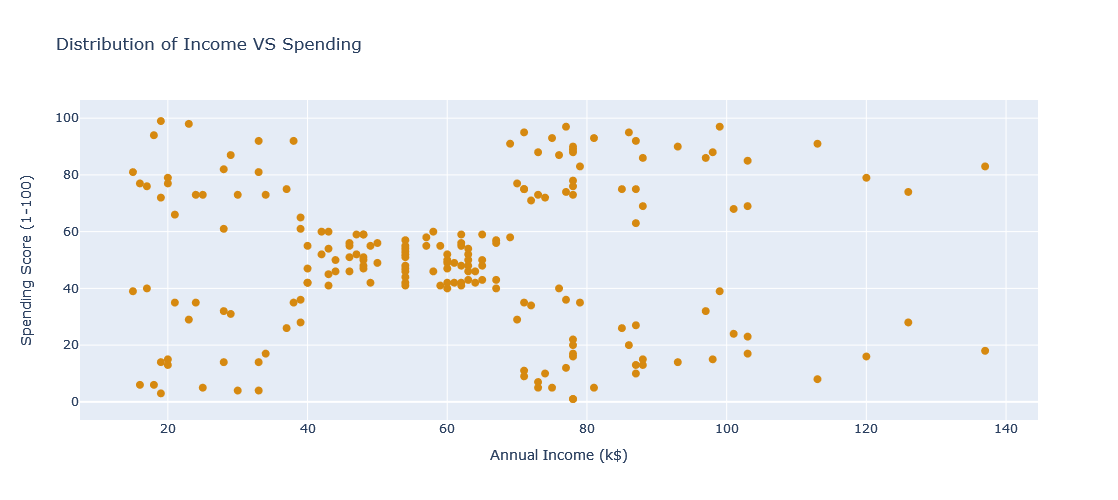

In [11]:
# lets check by plotting a scatter plot to show distribution of x and y
fig = go.Figure()

fig.add_trace(go.Scatter(x = x, y = y, mode = 'markers', marker = dict(size = 8, color = '#d68910', symbol = 'circle')))
fig.update_layout(title = 'Distribution of Income VS Spending', xaxis_title = 'Annual Income (k$)', yaxis_title = 'Spending Score (1-100)')
fig.update_layout(height = 500)
fig.show()

In [31]:
# scale values of x and y
scaler = StandardScaler()

x = scaler.fit_transform(x)
y = scaler.fit_transform(y)

In [36]:
# find the best k value
k_range = []
sse = []

# convert into numpy arrays
x = np.array(x)
y = np.array(y)

# reshape x and y
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
for k in range(1, 15):
    clusters = KMeans(n_clusters = k)
    clusters.fit(x, y)
    sse.append(clusters.inertia_)
    k_range.append(k)

In [37]:
sse

[200.00000000000006,
 70.89430805868078,
 34.26252462305623,
 19.344953095621484,
 12.356736949444493,
 7.358690035095043,
 5.728534387100465,
 4.119120694857045,
 3.370801999533571,
 2.6686131127812964,
 1.9466257575724775,
 1.4865616507781911,
 1.2879463521259458,
 1.1377470867489898]

In [38]:
k_range

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

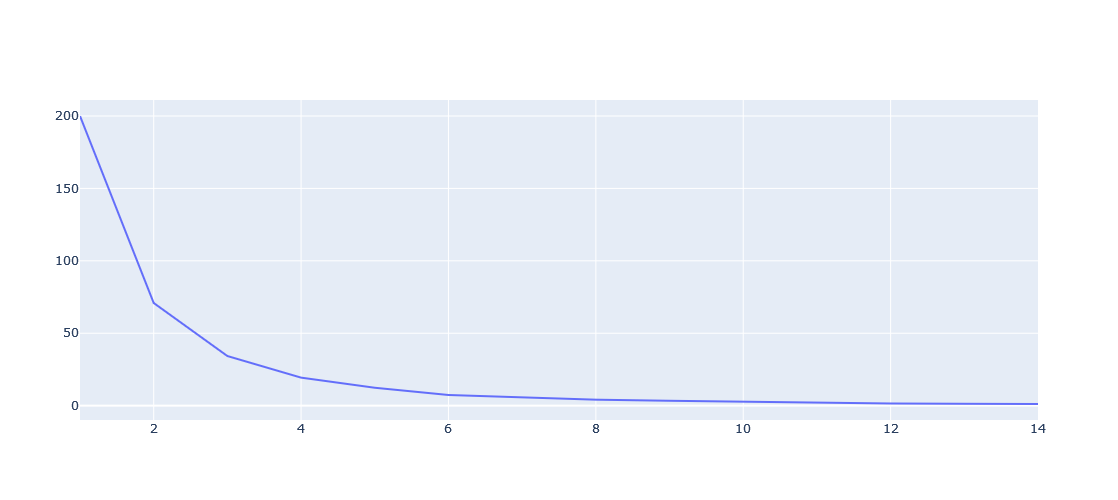

In [45]:
# plot a line graph to show k and error
fig = go.Figure()

fig.add_trace(go.Scatter(x = k_range, y = sse, mode = 'lines'))
fig.update_layout(height = 500)
fig.show()

In [41]:
# length of dataset
len(dataset)

200

In [39]:
# now apply kmeans
kmeans = KMeans(n_clusters = 3)

y_pred = kmeans.fit_predict(x, y)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [42]:
# add the y_pred as a column in dataset
dataset['Cluster'] = y_pred

In [43]:
dataset.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,0
1,1,21,15,81,0
2,0,20,16,6,0
3,0,23,16,77,0
4,0,31,17,40,0


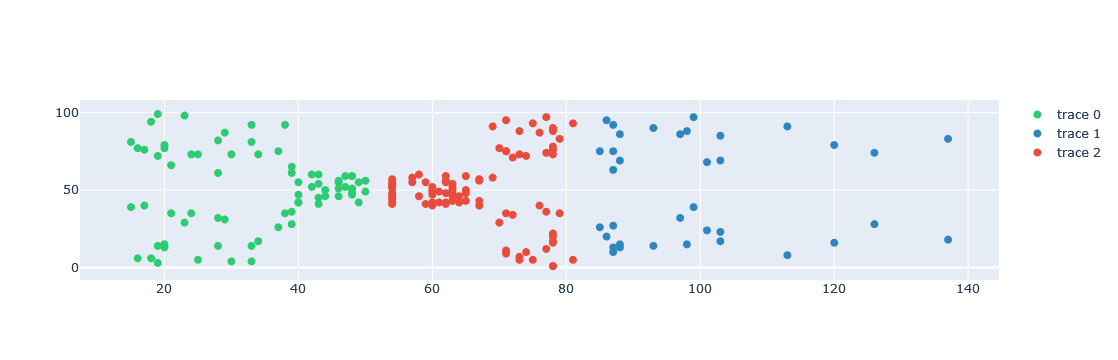

In [47]:
# now plot for each cluster
df1 = dataset[dataset.Cluster == 0]
df2 = dataset[dataset.Cluster == 1]
df3 = dataset[dataset.Cluster == 2]

fig = go.Figure()

fig.add_trace(go.Scatter(x = df1['Annual Income (k$)'], y = df1['Spending Score (1-100)'], mode = 'markers', marker = dict(size = 8, color = '#2ecc71', symbol = 'circle')))
fig.add_trace(go.Scatter(x = df2['Annual Income (k$)'], y = df2['Spending Score (1-100)'], mode = 'markers', marker = dict(size = 8, color = '#2e86c1', symbol = 'circle')))
fig.add_trace(go.Scatter(x = df3['Annual Income (k$)'], y = df3['Spending Score (1-100)'], mode = 'markers', marker = dict(size = 8, color = '#e74c3c', symbol = 'circle')))

fig.show()